<a href="https://colab.research.google.com/github/GDIAMEL/AI-POWERED-CROP-YIELD-PREDICTOR-FOR-SMALL-SCALE-FARMERS/blob/main/CROP_YIELD_PREDICTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI-POWERED-CROP-YIELD-PREDICTOR-FOR-SMALL-SCALE-FARMERS**

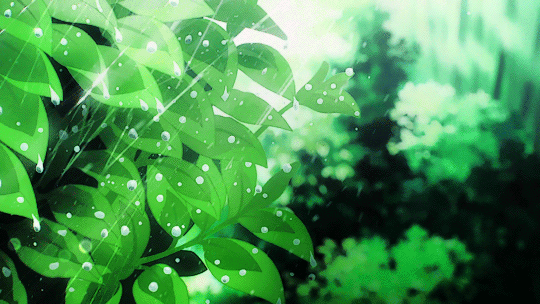

## **INTRODUCTION**

Agriculture remains a vital part of the global economy, especially for small-scale farmers who rely heavily on crop yields for their livelihoods. However, unpredictable weather patterns, limited access to data, and resource constraints often hinder their productivity. This project explores the development of an AI-powered crop yield predictor aimed at supporting small-scale farmers in making informed decisions. By leveraging machine learning techniques and agricultural data, the system is designed to forecast crop yields accurately, optimize resource usage, and ultimately improve food security and economic outcomes for smallholder farming communities.

### **IMPORTING LIBRARIES FOR ANALYSIS AND MACHINE LEARNING**

In [4]:
#IMPORTING ALL THE LIBRARIES NECESSARY FOR ANALYSIS AND MACHINE LEARNING
# FOR ANALYSIS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# MACHINE LEARNING
# DATA PREPROCESSING
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder # For encoding categorical variables

# MODELS
from sklearn.linear_model import LinearRegression # Linear Regression model
from sklearn.ensemble import RandomForestRegressor # Random Forest Regressor model
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regressor model
from sklearn.neighbors import KNeighborsRegressor # K-Nearest Neighbors Regressor model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **LOADING THE DATASET**

In [5]:
df = pd.read_csv('Smart_Farming_Crop_Yield_2024.csv')

# **EXPLORING THE DATASET**

In [6]:
# checking for the dataset overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

In [7]:
# checking for the size of the dataset
df.shape

(500, 22)

In [8]:
# checking for the statistical summary for the dataset
df.describe()

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,26.750140,6.523980,24.675740,181.685740,65.194460,7.03014,26.586980,119.496000,4032.92694,22.442473,80.392248,0.602060
std,10.150053,0.585558,5.348899,72.293091,14.642849,1.69167,13.202429,16.798046,1174.43304,7.283492,5.910664,0.175402
min,10.160000,5.510000,15.000000,50.170000,40.230000,4.01000,5.050000,90.000000,2023.56000,10.004243,70.020021,0.300000
25%,17.890000,6.030000,20.295000,119.217500,51.865000,5.66750,14.945000,105.750000,2994.82000,16.263202,75.374713,0.447500
50%,25.855000,6.530000,24.655000,191.545000,65.685000,6.99500,25.980000,119.000000,4071.69000,21.981743,80.650284,0.610000
75%,36.022500,7.040000,29.090000,239.035000,77.995000,8.47000,38.005000,134.000000,5062.11000,28.528948,85.654629,0.750000
max,44.980000,7.500000,34.840000,298.960000,90.000000,10.00000,49.940000,150.000000,5998.29000,34.981531,89.991901,0.900000


In [9]:
# checking for the top five
df.head()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,NaN
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2024-02-21,2024-07-04,134,4227.80,SENS0004,2024-05-14,31.071298,85.519998,0.44,NaN
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2024-02-05,2024-05-20,105,4979.96,SENS0005,2024-04-13,16.568540,81.691720,0.84,Severe


In [10]:
# checking for the least five
df.tail()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
495,FARM0496,Central USA,Rice,42.85,6.70,30.85,52.35,79.58,7.25,Manual,...,2024-01-16,2024-06-02,138,4251.40,SENS0496,2024-05-08,30.386623,76.147700,0.59,Mild
496,FARM0497,North India,Soybean,34.22,6.75,17.46,256.23,45.14,5.78,NaN,...,2024-01-01,2024-04-14,104,3708.54,SENS0497,2024-01-19,18.832748,75.736924,0.85,Severe
497,FARM0498,North India,Cotton,15.93,5.72,17.03,288.96,57.87,7.69,Drip,...,2024-01-02,2024-05-09,128,2604.41,SENS0498,2024-04-20,23.262016,81.992230,0.71,Mild
498,FARM0499,Central USA,Soybean,38.61,6.20,17.08,279.06,73.09,9.60,Drip,...,2024-01-25,2024-06-04,131,2586.36,SENS0499,2024-03-02,19.764989,84.426869,0.77,Severe
499,FARM0500,North India,Wheat,30.22,7.42,20.57,72.61,89.74,5.09,NaN,...,2024-02-16,2024-06-29,134,5891.40,SENS0500,2024-05-11,13.455532,88.880605,0.85,Severe


In [11]:
# Here we will head straight to check for the overall summary of the dataset
%pip install ydata-profiling

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('Smart_Farming_Crop_Yield_2024.csv')
prof = ProfileReport(df, title='PANDAS_PROFILING_REPORT')
prof.to_file(output_file='PANDAS_PROFILING_REPORT')

C:\Users\ninos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Render HTML: 100%|██████████| 1/1 [00:07<00:00,  7.42s/it]
C:\Users\ninos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ydata_profiling\profile_report.py:386: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]


# **DATA CLEANING**

Data cleaning is a crucial step in any data analysis and machine learning workflow. Raw data often contains inconsistencies, missing values, and errors that can negatively impact the performance of our models.

In this section, we will address these issues by:

-   Handling missing values (e.g., imputation or removal).
-   Identifying and dealing with duplicate records.
-   Correcting data types and formats if necessary.
-   Handling potential outliers (though a more in-depth analysis of outliers might be done in the exploratory data analysis phase).

By cleaning the data thoroughly, we aim to ensure its quality and reliability, leading to more accurate insights and better model performance.

In [13]:
# CHECKING FOR MISSING VALUES
df.isnull().sum()

farm_id                   0
region                    0
crop_type                 0
soil_moisture_%           0
soil_pH                   0
temperature_C             0
rainfall_mm               0
humidity_%                0
sunlight_hours            0
irrigation_type         150
fertilizer_type           0
pesticide_usage_ml        0
sowing_date               0
harvest_date              0
total_days                0
yield_kg_per_hectare      0
sensor_id                 0
timestamp                 0
latitude                  0
longitude                 0
NDVI_index                0
crop_disease_status     130
dtype: int64

It has been observed that there are significant missing values in both the irrigation type and crop disease status fields. Due to the large amount of missing data, I will use the mode (most frequent value) to fill these gaps for machine learning purposes.

In [14]:
# Assuming your DataFrame is named 'df'
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

farm_id                  0.0
region                   0.0
crop_type                0.0
soil_moisture_%          0.0
soil_pH                  0.0
temperature_C            0.0
rainfall_mm              0.0
humidity_%               0.0
sunlight_hours           0.0
irrigation_type         30.0
fertilizer_type          0.0
pesticide_usage_ml       0.0
sowing_date              0.0
harvest_date             0.0
total_days               0.0
yield_kg_per_hectare     0.0
sensor_id                0.0
timestamp                0.0
latitude                 0.0
longitude                0.0
NDVI_index               0.0
crop_disease_status     26.0
dtype: float64


In [15]:
# filling the missing values with mode
df['irrigation_type'] = df['irrigation_type'].fillna(df['irrigation_type'].mode()[0])


fill_value = df['irrigation_type'].mode()[0]
df.fillna({'irrigation_type': fill_value}, inplace=True)

In [16]:
# filling the missing values with mode
df['crop_disease_status'] = df['crop_disease_status'].fillna(df['crop_disease_status'].mode()[0])


fill_value = df['crop_disease_status'].mode()[0]
df.fillna({'crop_disease_status': fill_value}, inplace=True)

In [17]:
# CHECKING FOR MISSING VALUES
df.isnull().sum()

farm_id                 0
region                  0
crop_type               0
soil_moisture_%         0
soil_pH                 0
temperature_C           0
rainfall_mm             0
humidity_%              0
sunlight_hours          0
irrigation_type         0
fertilizer_type         0
pesticide_usage_ml      0
sowing_date             0
harvest_date            0
total_days              0
yield_kg_per_hectare    0
sensor_id               0
timestamp               0
latitude                0
longitude               0
NDVI_index              0
crop_disease_status     0
dtype: int64

Successfully handling missing values is a crucial step in data preprocessing as seen in the above thus ensuring the integrity and usability of the dataset. Missing data can distort statistical analyses, lead to biased model training, and cause errors in data processing workflows. By imputing or removing these gaps, I have created a more complete and reliable dataset that accurately reflects the underlying patterns, making it suitable for downstream tasks such as exploratory data analysis, visualization, and building robust machine learning models. This process is fundamental for deriving meaningful insights and building effective predictive systems.

In [18]:
# checking for duplicates in the data
df.duplicated().sum()

np.int64(0)

# **MACHINE LEARNING**

In [19]:
# Check the column names and data types of your DataFrame
print(df.columns)
print(df[['soil_moisture_%','soil_pH','yield_kg_per_hectare']].info())

Index(['farm_id', 'region', 'crop_type', 'soil_moisture_%', 'soil_pH',
       'temperature_C', 'rainfall_mm', 'humidity_%', 'sunlight_hours',
       'irrigation_type', 'fertilizer_type', 'pesticide_usage_ml',
       'sowing_date', 'harvest_date', 'total_days', 'yield_kg_per_hectare',
       'sensor_id', 'timestamp', 'latitude', 'longitude', 'NDVI_index',
       'crop_disease_status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   soil_moisture_%       500 non-null    float64
 1   soil_pH               500 non-null    float64
 2   yield_kg_per_hectare  500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB
None


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Defining Features (X) and Target (y)
# X will be a DataFrame with the feature columns
X = df[['soil_moisture_%', 'soil_pH']]

# y will be a Series with the target column
y = df['yield_kg_per_hectare']

# 2. Spliting the Data
# Spliting data into training and testing sets (e.g., 80% train, 20% test)
# random_state is for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the split data to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# 3. Choosing and Training a Model
# Initializing the Linear Regression model
model = LinearRegression()

# Training the model using the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Now y_pred contains the model's predictions for the yield based on the test features.
# The next step will be to evaluate these predictions.

Shape of X_train: (400, 2)
Shape of X_test: (100, 2)
Shape of y_train: (400,)
Shape of y_test: (100,)


In [21]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("\nModel Evaluation on the Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

# Printing the first few actual vs. predicted values for a quick look
print("\nSample Actual vs. Predicted Yields:")
print(y_test.head())
print(y_pred[:5])


Model Evaluation on the Test Set:
Mean Absolute Error (MAE): 1069.98
Mean Squared Error (MSE): 1445757.06
Root Mean Squared Error (RMSE): 1202.40
R-squared (R2): -0.0468

Sample Actual vs. Predicted Yields:
361    5867.22
73     5252.74
374    5192.59
155    2980.51
104    5235.26
Name: yield_kg_per_hectare, dtype: float64
[4000.63838414 3803.94079392 3899.55109674 4199.23912098 3771.74302971]


# **DATA VISUALIZATION**

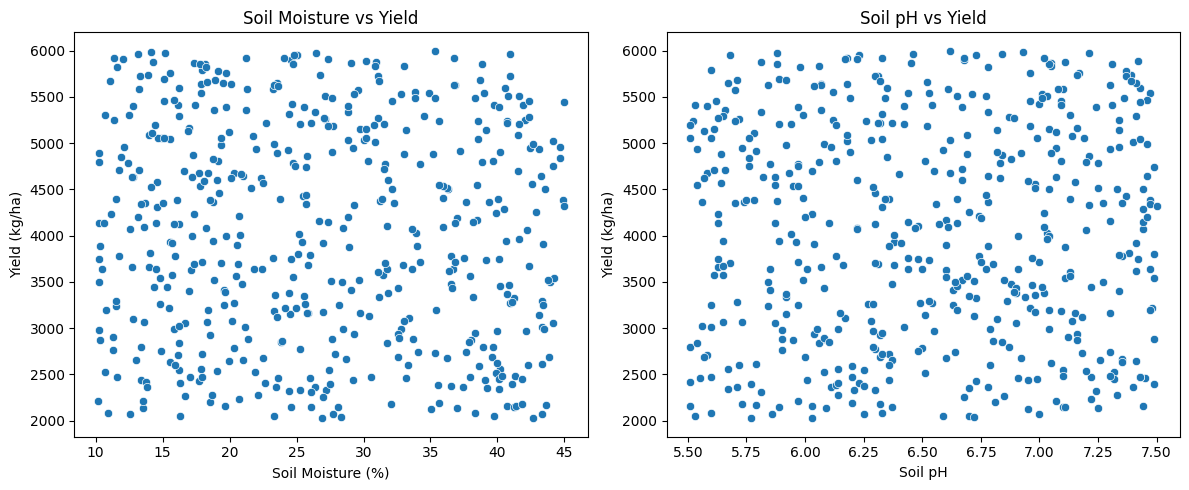

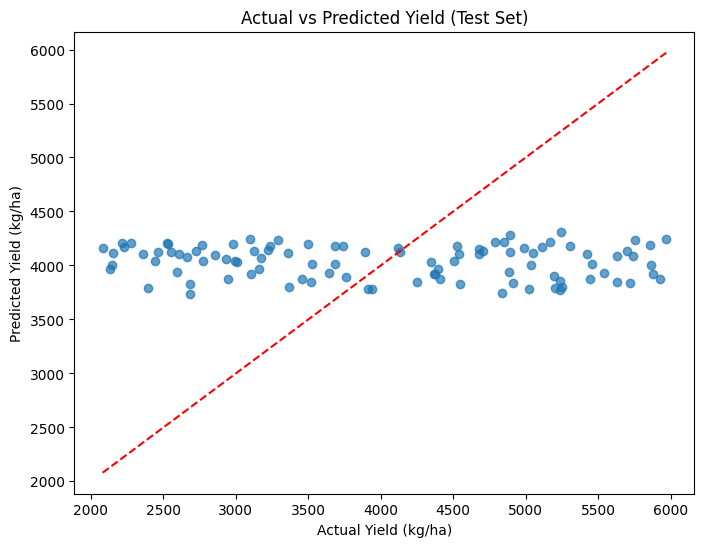

In [22]:
# Visualize the relationship between features and target

# Scatter plot: soil_moisture_% vs yield_kg_per_hectare
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='soil_moisture_%', y='yield_kg_per_hectare', data=df)
plt.title('Soil Moisture vs Yield')
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Yield (kg/ha)')

# Scatter plot: soil_pH vs yield_kg_per_hectare
plt.subplot(1, 2, 2)
sns.scatterplot(x='soil_pH', y='yield_kg_per_hectare', data=df)
plt.title('Soil pH vs Yield')
plt.xlabel('Soil pH')
plt.ylabel('Yield (kg/ha)')

plt.tight_layout()
plt.show()

# Plot actual vs predicted yields for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Yield (kg/ha)')
plt.ylabel('Predicted Yield (kg/ha)')
plt.title('Actual vs Predicted Yield (Test Set)')
plt.show()